In [13]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential
import time
start_run = time.time()

In [14]:
data = pd.read_csv(r"C:\Users\okechukwu chude\Documents\Neural Network\7088CEM---Artificial-Neural-Networks\GOOG.csv")
data=data.copy()
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [15]:
print("Total number of days: ",data.shape[0])

Total number of days:  1258


Checking for Missing Values

In [16]:
print("Null values:", data.isnull().values.sum())
print("NA values:", data.isna().values.any())

Null values: 0
NA values: False


In [17]:
data = data.drop(['symbol'],axis=1)


In [18]:
#splitting date column to date and time
data['date']= data['date'].str.split(" ", n = 1, expand = True)[0]
data['date']= pd.to_datetime(data['date'])

In [19]:
# Resample data to hourly basis
df = data.set_index('date').resample('m').first()

In [20]:
df.head(3)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-30,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
2016-07-31,699.21,700.65,692.1301,692.20,1344710,699.21,700.65,692.1301,692.20,1344710,0.0,1.0
2016-08-31,772.88,780.43,761.0900,761.09,2700470,772.88,780.43,761.0900,761.09,2700470,0.0,1.0


Stock Trend Overview

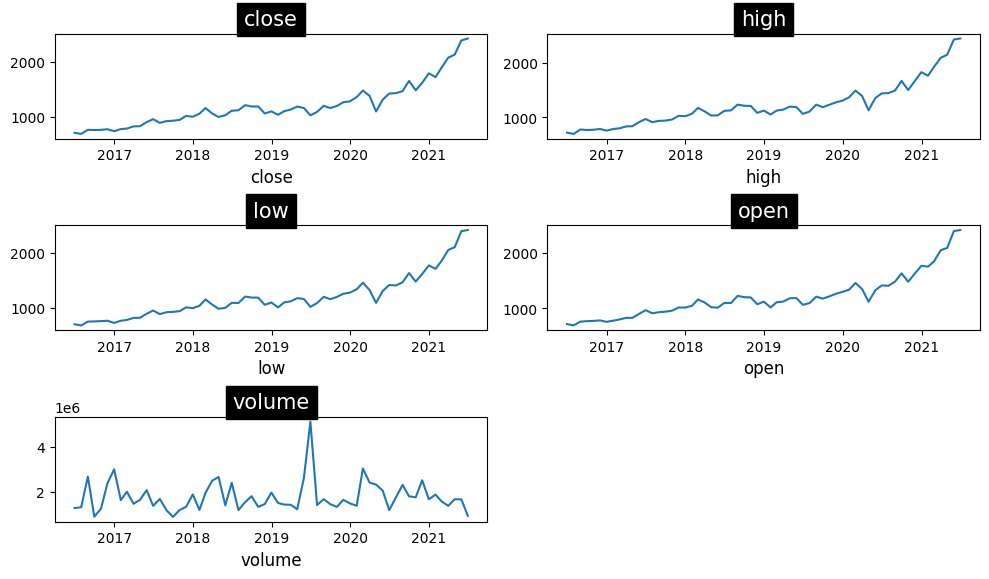

In [21]:
plt.figure(figsize = (10,15))
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

for index, i in enumerate(columns_to_plot):
    plt.subplot(8, 2, index + 1)
    plt.plot(df.index.values,df[i])
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

Stock Moving Average

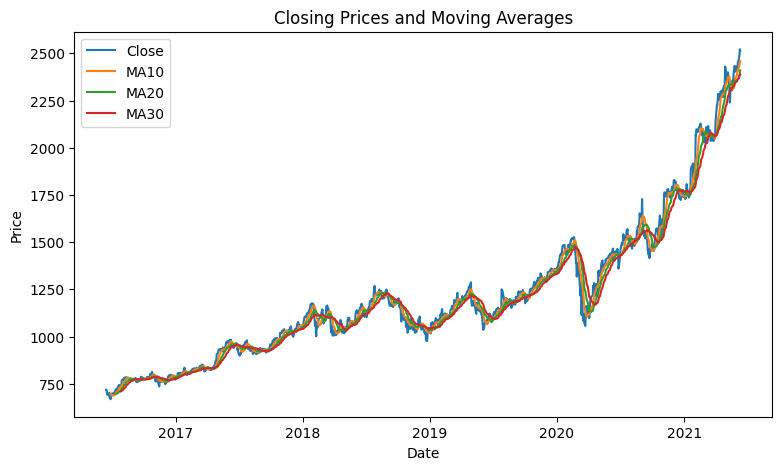

In [22]:
plt.figure(figsize=(9, 5))

data['MA10'] = data['close'].rolling(window=10).mean()
data['MA20'] = data['close'].rolling(window=20).mean()
data['MA30'] = data['close'].rolling(window=30).mean()

# Plotting the closing prices
plt.plot(data['date'], data['close'], label='Close')

# Plotting the moving averages
plt.plot(data['date'], data['MA10'], label='MA10')
plt.plot(data['date'], data['MA20'], label='MA20')
plt.plot(data['date'], data['MA30'], label='MA30')

plt.title('Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Stock Price Volatility

In [23]:
##measureing the volatility of a stock's price using pct_change

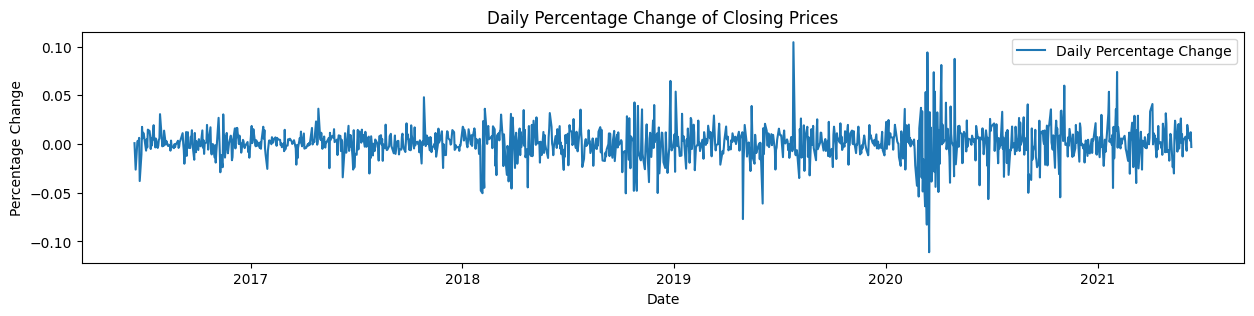

In [24]:
data['pct_change'] = data['close'].pct_change()

plt.figure(figsize=(15, 3))

# Plotting the percentage change
plt.plot(data['date'], data['pct_change'], label='Daily Percentage Change')

plt.title('Daily Percentage Change of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

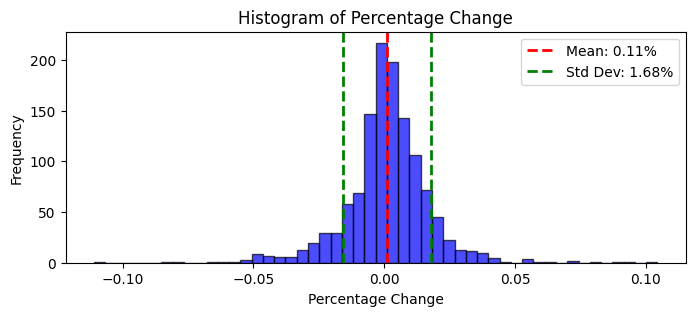

In [25]:
plt.figure(figsize=(8,3))
# Plotting the histogram
plt.hist(data['pct_change'], bins=50, alpha=0.7, color='blue', edgecolor='black')

# Adding a vertical line at the mean
mean_pct_change = data['pct_change'].mean()
plt.axvline(mean_pct_change, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_pct_change:.2%}')

# Adding a vertical line at one standard deviation above the mean
std_dev_pct_change = data['pct_change'].std()
plt.axvline(mean_pct_change + std_dev_pct_change, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_pct_change:.2%}')

# Adding a vertical line at one standard deviation below the mean
plt.axvline(mean_pct_change - std_dev_pct_change, color='green', linestyle='dashed', linewidth=2)

plt.title('Histogram of Percentage Change')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Analysing Stock Returns

In [26]:
mean_return = data['pct_change'].mean()
std_dev_return = data['pct_change'].std()
skewness = data['pct_change'].skew()
kurtosis = data['pct_change'].kurtosis()

print(f"Mean Return: {mean_return:.4%}")
print(f"Standard Deviation: {std_dev_return:.4%}")
print(f"Skewness: {skewness:.4}")
print(f"Kurtosis: {kurtosis:.4}")


Mean Return: 0.1139%
Standard Deviation: 1.6847%
Skewness: -0.07836
Kurtosis: 6.369


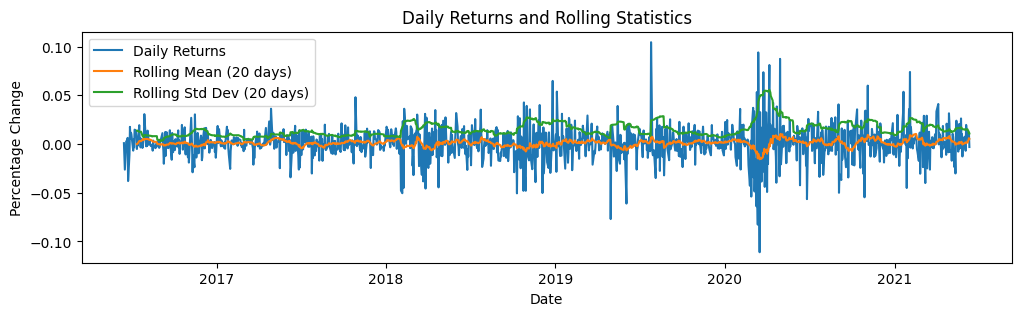

In [27]:
rolling_mean = data['pct_change'].rolling(window=20).mean()
rolling_std = data['pct_change'].rolling(window=20).std()

plt.figure(figsize=(12, 3))
plt.plot(data['date'], data['pct_change'], label='Daily Returns')
plt.plot(data['date'], rolling_mean, label='Rolling Mean (20 days)')
plt.plot(data['date'], rolling_std, label='Rolling Std Dev (20 days)')
plt.title('Daily Returns and Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


In [28]:
#standard deviation for each days return
data['std_dev'] = data['pct_change'].rolling(window=20).std()

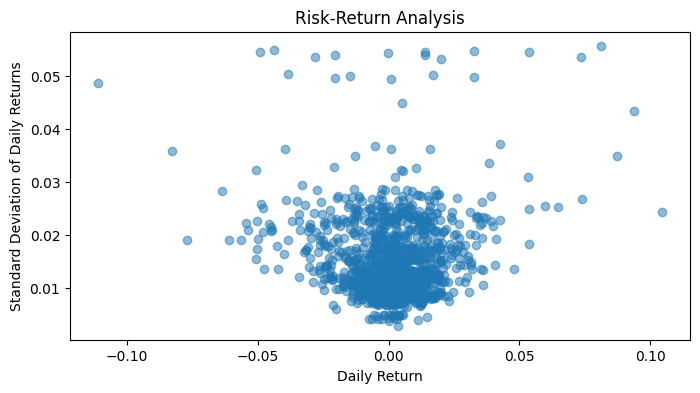

In [29]:
plt.figure(figsize=(8, 4))
plt.scatter(data['pct_change'], data['std_dev'], alpha=0.5)
plt.title('Risk-Return Analysis')
plt.xlabel('Daily Return')
plt.ylabel('Standard Deviation of Daily Returns')
plt.show()

BUilding Predictive Model

In [30]:
#Seperating target and feature vaeriables
# Create a new dataframe with only the 'Close column 
close_data = data.filter(['close'])
# Convert the dataframe to a numpy array
dataset = close_data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1007

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [32]:
train = scaled_data[0:int(training_data_len), :]

time_step = 30

In [33]:
##### Create the training data set

x_train = []
y_train = []

for i in range(time_step, len(train)):
    x_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(x_train)
        print(y_train)
        print()
        

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598])]
[0.03966352639019283]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,
       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,
       0.00855213, 0.01286326, 0.

In [34]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


In [36]:
# Create the testing data set
test = scaled_data[training_data_len-time_step:, :]

In [37]:
# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len:, :]

In [38]:
for i in range(time_step, len(test)):
    x_test.append(test[i-time_step:i, 0])
    

In [39]:
# Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)


In [40]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [41]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [42]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [43]:
MODEL = model.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 6s 122ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_loss: 3478366.5000 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 1s 66ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 3478072.7500 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 1s 63ms/step - loss: 5.5765e-04 - accuracy: 0.0000e+00 - val_loss: 3477780.7500 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 1s 65ms/step - loss: 4.3054e-04 - accuracy: 0.0000e+00 - val_loss: 3477810.2500 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 4.0639e-04 - accuracy: 0.0000e+00 - val_loss: 3477853.5000 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 1s 66ms/step - loss: 3.9103e-04 - accuracy: 0.0000e+00 - val_loss: 3477871.2500 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 1

In [44]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 18ms/step


In [45]:
from sklearn.metrics import mean_squared_error,r2_score

r2Score_test = r2_score(y_test, predictions)
print('test R2 Score: %.2f ' % (r2Score_test))


test R2 Score: 0.97 


In [46]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

55.68412344954074

In [47]:
data.head(1)

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MA10,MA20,MA30,pct_change,std_dev
0,2016-06-14,718.27,722.47,713.12,716.48,1306065,718.27,722.47,713.12,716.48,1306065,0.0,1.0,NaN,NaN,NaN,NaN,NaN


C:\Users\okechukwu chude\AppData\Local\Temp\ipykernel_5876\2797152509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


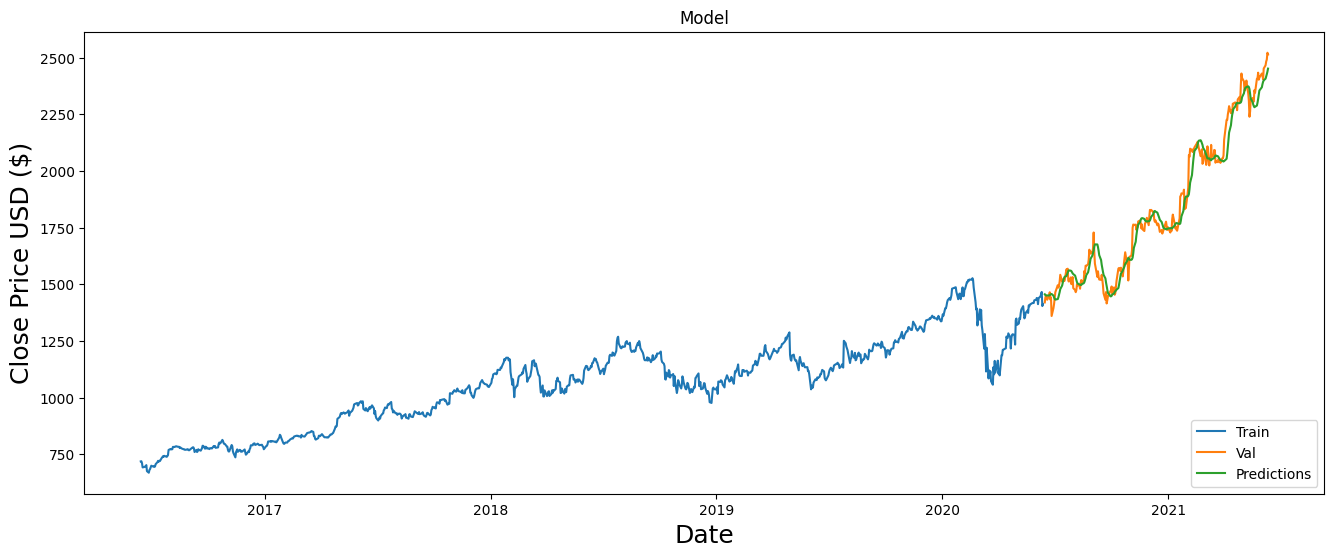

In [48]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['date'].iloc[:1007],train['close'])
plt.plot(data['date'].iloc[1007:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
# Build the Simple RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_rnn.add(SimpleRNN(64, return_sequences=False))
model_rnn.add(Dense(25))
model_rnn.add(Dense(1))

In [50]:
# Compile the Simple RNN model
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [51]:
# Train the Simple RNN model
MODEL_RNN = model_rnn.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 2s 40ms/step - loss: 0.1810 - accuracy: 0.0000e+00 - val_loss: 3479142.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 3479060.5000 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 3478853.7500 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 3478573.2500 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 6.5616e-04 - accuracy: 0.0000e+00 - val_loss: 3478279.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 4.1887e-04 - accuracy: 0.0000e+00 - val_loss: 3478204.5000 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 0s 21ms/st

In [52]:
# Get the models predicted price values 
rnn_predictions = model_rnn.predict(x_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)

8/8 [==============================] - 0s 6ms/step


In [53]:
rnn_r2Score = r2_score(y_test, rnn_predictions)
print('RNN test R2 Score: %.2f ' % (rnn_r2Score))

RNN test R2 Score: 0.73 


In [54]:
# Get the root mean squared error (RMSE)
rnn_rmse = np.sqrt(np.mean(((rnn_predictions - y_test) ** 2)))
rnn_rmse

168.30498889620384

C:\Users\okechukwu chude\AppData\Local\Temp\ipykernel_5876\2006764496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = rnn_predictions


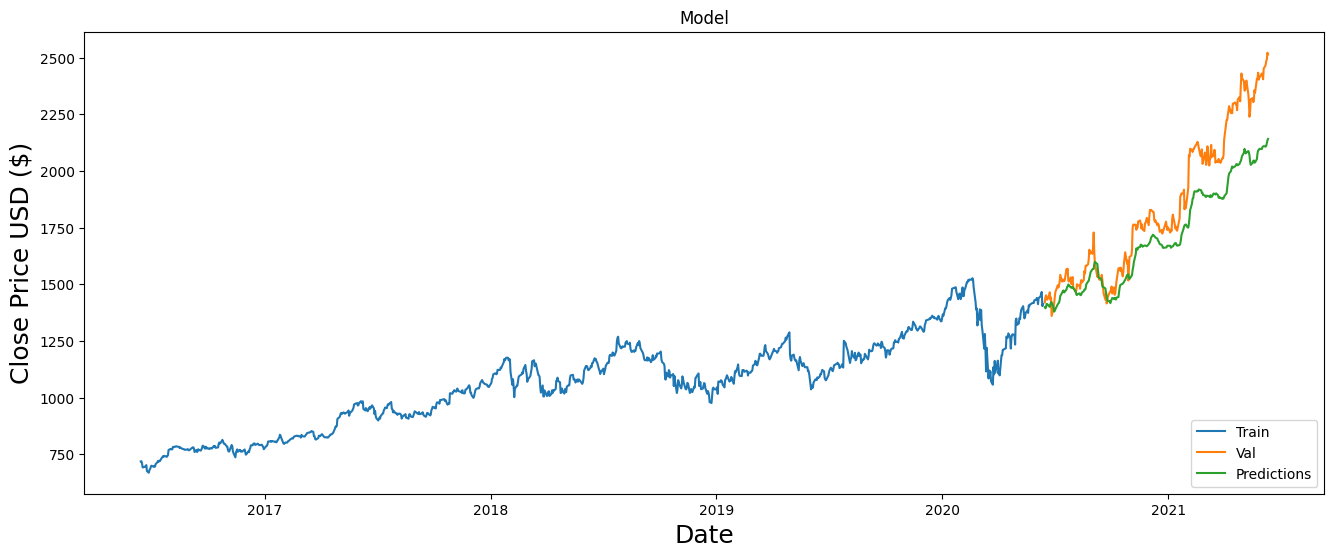

In [55]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = rnn_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['date'].iloc[:1007],train['close'])
plt.plot(data['date'].iloc[1007:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [56]:
# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))

In [57]:
# Compile the GRU model
model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [58]:
# Train the GRU model
MODEL_GRU = model_gru.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 5s 95ms/step - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 3478567.5000 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 3478140.2500 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 4.1841e-04 - accuracy: 0.0000e+00 - val_loss: 3477827.5000 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 2.5698e-04 - accuracy: 0.0000e+00 - val_loss: 3477828.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 2.1391e-04 - accuracy: 0.0000e+00 - val_loss: 3477832.2500 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 1.9563e-04 - accuracy: 0.0000e+00 - val_loss: 3477821.5000 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 1s

In [59]:
gru_predictions = model_gru.predict(x_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

8/8 [==============================] - 1s 14ms/step


In [60]:
gru_r2Score = r2_score(y_test, gru_predictions)
print('GRU test R2 Score: %.2f ' % (gru_r2Score))

GRU test R2 Score: 0.98 


In [61]:
gru_rmse = np.sqrt(np.mean(((gru_predictions - y_test) ** 2)))
gru_rmse

50.497980085088365

C:\Users\okechukwu chude\AppData\Local\Temp\ipykernel_5876\3002560381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = gru_predictions


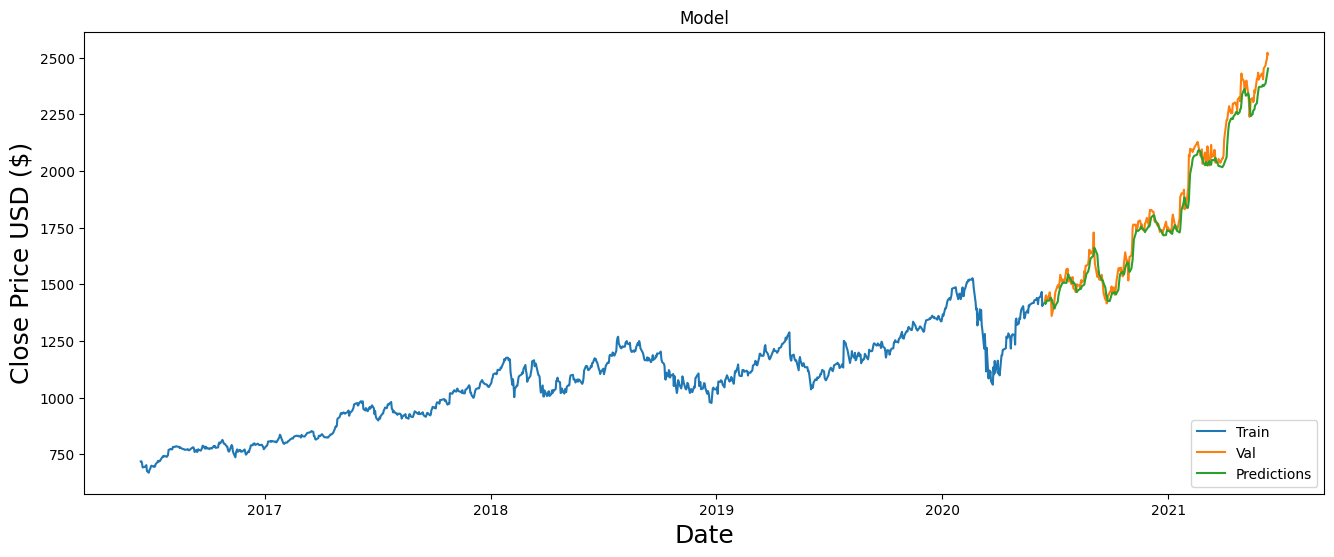

In [62]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = gru_predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['date'].iloc[:1007],train['close'])
plt.plot(data['date'].iloc[1007:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [63]:
# Build the MLP model
from tensorflow.keras.layers import Dense, Flatten

model_mlp = Sequential()
model_mlp.add(Dense(128, activation='relu', input_shape=(x_train.shape[1], 1)))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Flatten())
model_mlp.add(Dense(25, activation='relu'))
model_mlp.add(Dense(1))

In [64]:
# Compile the MLP model
model_mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [65]:
# Train the MLP model
MODEL_MLP = model_mlp.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 0.0159 - accuracy: 0.0000e+00 - val_loss: 3478499.5000 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 3478208.2500 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 3478048.2500 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 9.1007e-04 - accuracy: 0.0000e+00 - val_loss: 3478023.2500 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 7.8987e-04 - accuracy: 0.0000e+00 - val_loss: 3477978.2500 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 7.2689e-04 - accuracy: 0.0000e+00 - val_loss: 3477901.2500 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 0s 9ms/ste

In [66]:
# Get the models predicted price values 
mlp_predictions = model_mlp.predict(x_test)
mlp_predictions = scaler.inverse_transform(mlp_predictions)

8/8 [==============================] - 0s 3ms/step


In [67]:
# Evaluate performance metrics for the MLP model
mlp_r2Score = r2_score(y_test, mlp_predictions)
print('MLP test R2 Score: %.2f ' % (mlp_r2Score))

MLP test R2 Score: 0.93 


In [68]:
mlp_rmse = np.sqrt(np.mean(((mlp_predictions - y_test) ** 2)))
print('MLP Root Mean Squared Error (RMSE): %.2f ' % mlp_rmse)

MLP Root Mean Squared Error (RMSE): 83.28 


In [69]:
# Create a table for performance metrics
metrics_data = {
    'Model': ['LSTM', 'Simple RNN', 'GRU','MLP'],
    'R2 Score': [r2Score_test, rnn_r2Score, gru_r2Score,mlp_r2Score],
    'RMSE': [rmse, rnn_rmse, gru_rmse,mlp_rmse]
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)

        Model  R2 Score        RMSE
0        LSTM  0.970444   55.684123
1  Simple RNN  0.729993  168.304989
2         GRU  0.975693   50.497980
3         MLP  0.933892   83.279182


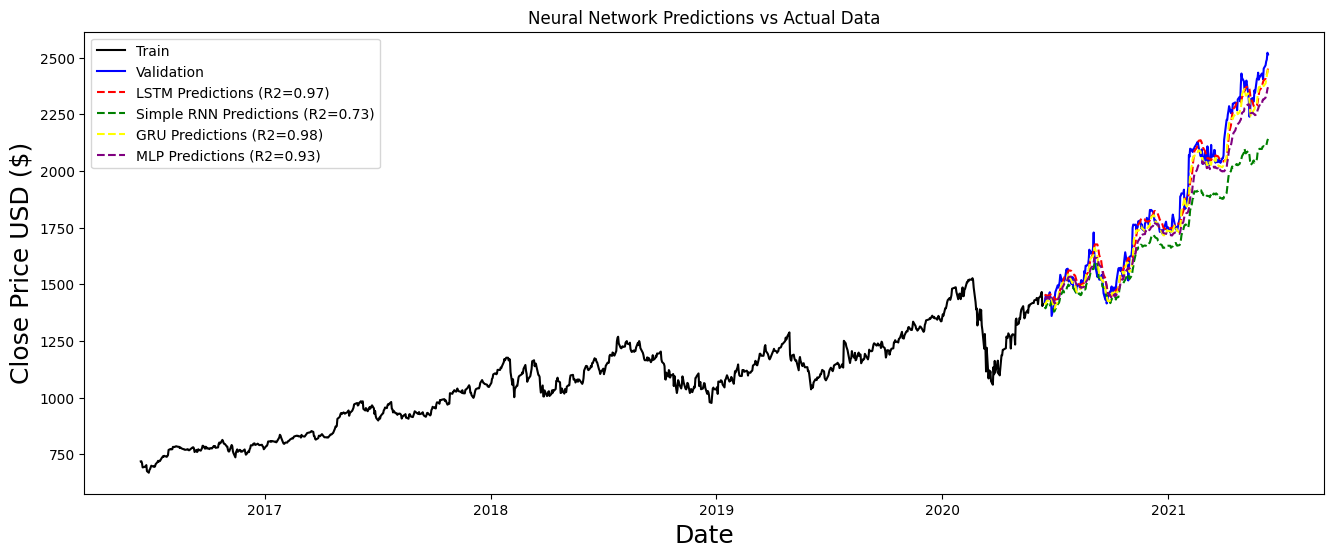

In [70]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

plt.figure(figsize=(16, 6))

# Plot actual data
plt.plot(data['date'].iloc[:1007], train['close'], label='Train', color='black')
plt.plot(data['date'].iloc[1007:], valid['close'], label='Validation', color='blue')

# Plot LSTM predictions
plt.plot(data['date'].iloc[1007:], predictions, label=f'LSTM Predictions (R2={r2Score_test:.2f})', linestyle='dashed', color='red')

# Plot Simple RNN predictions
plt.plot(data['date'].iloc[1007:], rnn_predictions, label=f'Simple RNN Predictions (R2={rnn_r2Score:.2f})', linestyle='dashed', color='green')

# Plot GRU predictions
plt.plot(data['date'].iloc[1007:], gru_predictions, label=f'GRU Predictions (R2={gru_r2Score:.2f})', linestyle='dashed', color='yellow')

# Plot MLP predictions
plt.plot(data['date'].iloc[1007:], mlp_predictions, label=f'MLP Predictions (R2={mlp_r2Score:.2f})', linestyle='dashed', color='purple')

plt.title('Neural Network Predictions vs Actual Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, median_absolute_error, explained_variance_score

In [72]:
# Evaluate performance metrics for each model
mae_lstm = mean_absolute_error(y_test, predictions)
mae_rnn = mean_absolute_error(y_test, rnn_predictions)
mae_gru = mean_absolute_error(y_test, gru_predictions)
mae_mlp = mean_absolute_error(y_test, mlp_predictions)

msle_lstm = mean_squared_log_error(y_test, predictions)
msle_rnn = mean_squared_log_error(y_test, rnn_predictions)
msle_gru = mean_squared_log_error(y_test, gru_predictions)
msle_mlp = mean_squared_log_error(y_test, mlp_predictions)

medae_lstm = median_absolute_error(y_test, predictions)
medae_rnn = median_absolute_error(y_test, rnn_predictions)
medae_gru = median_absolute_error(y_test, gru_predictions)
medae_mlp = median_absolute_error(y_test, mlp_predictions)

evs_lstm = explained_variance_score(y_test, predictions)
evs_rnn = explained_variance_score(y_test, rnn_predictions)
evs_gru = explained_variance_score(y_test, gru_predictions)
evs_mlp = explained_variance_score(y_test, mlp_predictions)


In [73]:
# Evaluate performance metrics for each model
metrics_data = {
    'Model': ['LSTM', 'Simple RNN', 'GRU', 'MLP'],
    'R2 Score': [r2Score_test, rnn_r2Score, gru_r2Score,mlp_r2Score],
    'RMSE': [rmse, rnn_rmse, gru_rmse,mlp_rmse],
    'MAE': [mae_lstm, mae_rnn, mae_gru, mae_mlp],
    'MSLE': [msle_lstm, msle_rnn, msle_gru, medae_mlp],
    'MedAE': [medae_lstm, medae_rnn, medae_gru, medae_mlp],
    'EVS': [evs_lstm, evs_rnn, evs_gru, evs_mlp]
}

metrics_table = pd.DataFrame(metrics_data)
print(metrics_table)

        Model  R2 Score        RMSE         MAE       MSLE      MedAE  \
0        LSTM  0.970444   55.684123   42.417360   0.000910  32.307510   
1  Simple RNN  0.729993  168.304989  134.839944   0.006824  98.342280   
2         GRU  0.975693   50.497980   38.821623   0.000719  32.799033   
3         MLP  0.933892   83.279182   65.681711  54.409399  54.409399   

        EVS  
0  0.971380  
1  0.897538  
2  0.984076  
3  0.962455  


In [75]:
stop_run = time.time()

total_time = stop_run - start_run

project_time_minutes = total_time / 60

print("Total time of iteration is: %0.1f minutes" % project_time_minutes)


Total time of iteration is: 4.8 minutes
